In [ ]:
pip install gudhi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from fbm import FBM
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import csv
import pandas as pd
import gudhi as gd
from gudhi.representations import DiagramSelector, BettiCurve
import pandas as pd



#read saved data and make pc

In [ ]:

data_FBM_15=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FBM0.15.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)
data_FGN_15=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FGN0.15.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)

data_FBM_55=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FBM0.55.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)
data_FGN_55=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FGN0.55.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)


data_FBM_85=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FBM0.85.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)
data_FGN_85=np.load(open('/content/drive/MyDrive/cod/data_fgn_fbm/FGN0.85.npy', 'rb'))[0,:]#data_FBM.shape=(100, 1001)



In [ ]:
data_FBM_15.shape

(10001,)

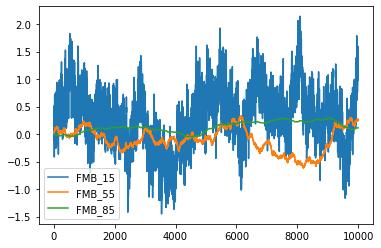

In [ ]:
plt.plot(data_FBM_15,label="FMB_15")
plt.plot(data_FBM_55,label="FMB_55")
plt.plot(data_FBM_85,label="FMB_85")

# plt.plot(data_FGN_15,label="FGN_15")
# plt.plot(data_FGN_55,label="FGN_55")
# plt.plot(data_FGN_85,label="FGN_85")
plt.legend()

## making point cloads

In [ ]:
#make point cloud from FBM
x_FBM_15=data_FBM_15[:-1:2]
y_FMB_15=data_FBM_15[1::2]

x_FBM_55=data_FBM_55[:-1:2]
y_FMB_55=data_FBM_55[1::2]

x_FBM_85=data_FBM_85[:-1:2]
y_FMB_85=data_FBM_85[1::2]

pc_FBM_15=np.array(list(zip(x_FBM_15,y_FMB_15)))
pc_FBM_55=np.array(list(zip(x_FBM_55,y_FMB_55)))
pc_FBM_85=np.array(list(zip(x_FBM_85,y_FMB_85)))

x_FBM_15.shape,y_FMB_15.shape


((5000,), (5000,))

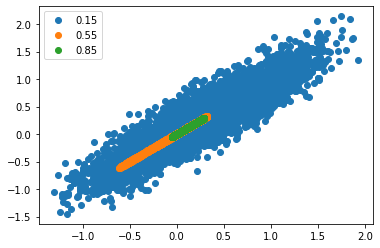

In [ ]:
plt.plot(x_FBM_15,y_FMB_15,"o",label="0.15")
plt.plot(x_FBM_55,y_FMB_55,"o",label="0.55")
plt.plot(x_FBM_85,y_FMB_85,"o",label="0.85")
plt.legend()

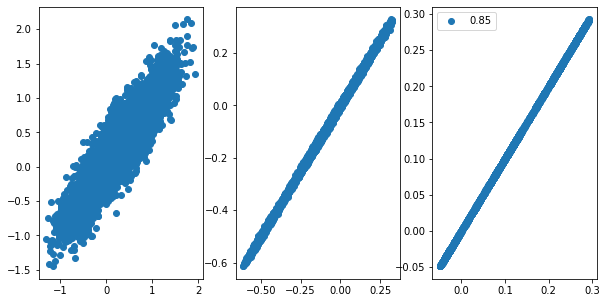

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(10,5))

ax[0].plot(x_FBM_15,y_FMB_15,"o",label="0.15")
plt.legend()
ax[1].plot(x_FBM_55,y_FMB_55,"o",label="0.55")
plt.legend()
ax[2].plot(x_FBM_85,y_FMB_85,"o",label="0.85")
plt.legend()
plt.show()

#make fearures with new data

In [ ]:
h=0.15
time_series=FBM(n=10000, hurst=h, length=1, method='daviesharte')  #t interval is length*(0,1)
# Generate a fBm realization
fbm_dataset = time_series.fbm()


In [ ]:
#make point cload
x_FBM_15=fbm_dataset[:-1:2]
y_FMB_15=fbm_dataset[1::2]
pc_FBM_15=np.array(list(zip(x_FBM_15,y_FMB_15)))

In [ ]:
rc_FBM_15=gd.RipsComplex(points= pc_FBM_15)
st_FBM_15=rc_FBM_15.create_simplex_tree(max_dimension=2)
all_persistan_15=st_FBM_15.persistence()
st_FBM_15.compute_persistence()


In [ ]:
#persistant pairs==PPS
PPS_0_15=st_FBM_15.persistence_intervals_in_dimension(0)
PPS_1_15=st_FBM_15.persistence_intervals_in_dimension(1)

In [ ]:
n_0_15=len(st_FBM_15.persistence_intervals_in_dimension(0))
n_1_15=len(st_FBM_15.persistence_intervals_in_dimension(1))

In [ ]:
#persistant pairs==PPS
# H==hurst exponent
def Entropy_n(pps_n_H):
  li_list=[]
  for  l in pps_n_H:
    li=l[1]-l[0]
    if li!=np.inf:
      li_list.append(li)
  E=0
  for li in li_list:
    E+=-(li/np.sum(li_list))*np.log((li/np.sum(li_list)))
  return E





In [ ]:
E_0=E_n(PPS_0_15)
E_1=E_n(PPS_1_15)
E_0,E_1

(6.010646564087281, 4.409839621346794)

In [ ]:
from numpy.random import normal
#betti curve
betti_curve_model_n_0_FBM_H_15=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_0_15])
betti_curve_n_0_FBM_H_15=BettiCurve(resolution=1000).fit_transform(betti_curve_model_n_0_FBM_H_15)

betti_curve_model_n_1_FBM_H_15=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_1_15])
betti_curve_n_1_FBM_H_15=BettiCurve(resolution=100,normal=True).fit_transform(betti_curve_model_n_1_FBM_H_15)


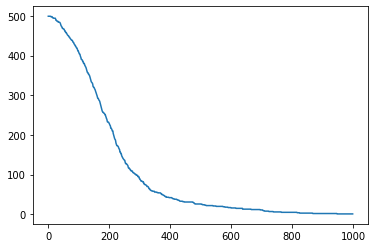

In [ ]:

plt.plot(betti_curve_n_0_FBM_H_15[0]);

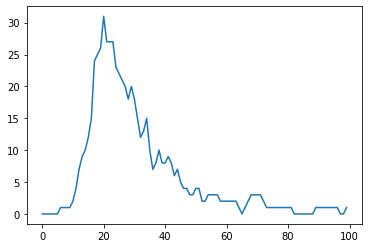

In [ ]:

plt.plot(betti_curve_n_1_FBM_H_15[0]);

In [ ]:
a=betti_curve_n_1_FBM_H_15[0]
b=betti_curve_n_1_FBM_H_15[0]
c=betti_curve_n_1_FBM_H_15[0]
len(np.sum([a,b,c],axis=0)),len(a)

(100, 100)

In [ ]:
ensemblenumber=10
h=0.15
ensembel_betticurves=[]
for ens in tqdm(range(ensemblenumber)):
  time_series=FBM(n=1000, hurst=h, length=1, method='daviesharte')  #t interval is length*(0,1)
  fbm_dataset = time_series.fbm()

  x_FBM_15=fbm_dataset[:-1:2]
  y_FMB_15=fbm_dataset[1::2]
  pc_FBM_15=np.array(list(zip(x_FBM_15,y_FMB_15)))

  rc_FBM_15=gd.RipsComplex(points= pc_FBM_15)
  st_FBM_15=rc_FBM_15.create_simplex_tree(max_dimension=2)
  # all_persistan_15=st_FBM_15.persistence()
  st_FBM_15.compute_persistence()

  n_0_15=len(st_FBM_15.persistence_intervals_in_dimension(0))
  n_1_15=len(st_FBM_15.persistence_intervals_in_dimension(1))

  # PPS_0_15=st_FBM_15.persistence_intervals_in_dimension(0)
  PPS_1_15=st_FBM_15.persistence_intervals_in_dimension(1)


  # betti_curve_model_n_0_FBM_H_15=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_0_15])
  # betti_curve_n_0_FBM_H_15=BettiCurve(resolution=1000).fit_transform(betti_curve_model_n_0_FBM_H_15)
  betti_curve_model_n_1_FBM_H_15=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_1_15])
  betti_curve_n_1_FBM_H_15=BettiCurve(resolution=100).fit_transform(betti_curve_model_n_1_FBM_H_15)
  ensembel_betticurves.append( betti_curve_n_1_FBM_H_15[0])


100%|██████████| 10/10 [04:20<00:00, 26.09s/it]


In [ ]:
ensemblenumber=10
h=0.75
ensembel_betticurves_75=[]
for ens in tqdm(range(ensemblenumber)):
  time_series=FBM(n=1000, hurst=h, length=1, method='daviesharte')  #t interval is length*(0,1)
  fbm_dataset = time_series.fbm()

  x_FBM_75=fbm_dataset[:-1:2]
  y_FMB_75=fbm_dataset[1::2]
  pc_FBM_75=np.array(list(zip(x_FBM_75,y_FMB_75)))

  rc_FBM_75=gd.RipsComplex(points= pc_FBM_75)
  st_FBM_75=rc_FBM_75.create_simplex_tree(max_dimension=2)
  # all_persistan_75=st_FBM_75.persistence()
  st_FBM_75.compute_persistence()

  n_0_75=len(st_FBM_75.persistence_intervals_in_dimension(0))
  n_1_75=len(st_FBM_75.persistence_intervals_in_dimension(1))

  # PPS_0_75=st_FBM_75.persistence_intervals_in_dimension(0)
  PPS_1_75=st_FBM_75.persistence_intervals_in_dimension(1)

  # betti_curve_model_n_0_FBM_H_15=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_0_15])
  # betti_curve_n_0_FBM_H_15=BettiCurve(resolution=1000).fit_transform(betti_curve_model_n_0_FBM_H_15)
  betti_curve_model_n_1_FBM_H_75=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_1_75])
  betti_curve_n_1_FBM_H_75=BettiCurve(resolution=100).fit_transform(betti_curve_model_n_1_FBM_H_75)
  ensembel_betticurves_75.append( betti_curve_n_1_FBM_H_75[0])

100%|██████████| 10/10 [03:49<00:00, 22.94s/it]


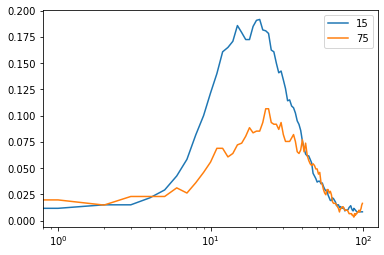

In [ ]:
ensemble_mean_betticurve=np.mean(ensembel_betticurves,axis=0)
ensemble_mean_betticurve_75=np.mean(ensembel_betticurves_75,axis=0)
plt.semilogx(ensemble_mean_betticurve/len(PPS_1_15),label="15")
plt.semilogx(ensemble_mean_betticurve_75/len(PPS_1_75),label="75")
plt.legend()


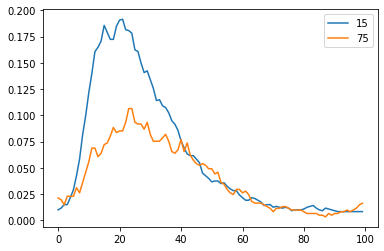

In [ ]:
plt.plot(ensemble_mean_betticurve/len(PPS_1_15),label="15")
plt.plot(ensemble_mean_betticurve_75/len(PPS_1_75) v)
plt.legend()

In [ ]:
n_0_15=len(st_FBM_15.persistence_intervals_in_dimension(0))
n_1_15=len(st_FBM_15.persistence_intervals_in_dimension(1))

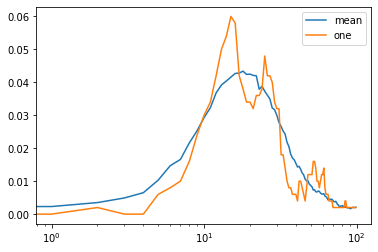

In [ ]:
plt.semilogx(ensemble_mean_betticurve/len(PPS_1_15),label="mean")
plt.semilogx(betti_curve_n_1_FBM_H_15[0]/len(PPS_1_15),label="one")
plt.legend()

In [ ]:
def E_detection(betti_curve_n_n_FBM_H_H):
  index_list=[i for i in range(len(betti_curve_n_n_FBM_H_H)) if betti_curve_n_n_FBM_H_H[i] !=0]
  E_apear, E_disapear,E_max=index_list[0],index_list[-1],np.where(betti_curve_n_n_FBM_H_H==np.max(betti_curve_n_n_FBM_H_H))[0][0]
  return E_apear, E_max,E_disapear

In [ ]:
E_apear, E_max,E_disapear=E_detection(betti_curve_n_1_FBM_H_15[0])
E_apear,E_max, E_disapear

(2, 99, 27)

In [ ]:
hurst_exponent=np.arange(0.05,1,0.1)
features=[]
ensemblenumber
for H in hurst_exponent:
  print(H)
  ensemblenumber=20
  ensembel_betticurves_H=[]
  ensembel_n_1_H=[]
  ensembel_E_0_H=[]
  ensembel_E_1_H=[]

  for ens in tqdm(range(ensemblenumber)):
    time_series=FBM(n=1000, hurst=H, length=1, method='daviesharte')  #t interval is length*(0,1)
    fbm_dataset = time_series.fbm()

    x_FBM_H=fbm_dataset[:-1:2]
    y_FMB_H=fbm_dataset[1::2]
    pc_FBM_H=np.array(list(zip(x_FBM_H,y_FMB_H)))

    rc_FBM_H=gd.RipsComplex(points= pc_FBM_H)
    st_FBM_H=rc_FBM_H.create_simplex_tree(max_dimension=2)
    # all_persistan_H=st_FBM_H.persistence()
    st_FBM_H.compute_persistence()

    n_0_H=len(st_FBM_H.persistence_intervals_in_dimension(0))
    n_1_H=len(st_FBM_H.persistence_intervals_in_dimension(1))
    ensembel_n_1_H.append(n_1_H)

    PPS_0_H=st_FBM_H.persistence_intervals_in_dimension(0)
    PPS_1_H=st_FBM_H.persistence_intervals_in_dimension(1)

    ensembel_E_0_H.append(Entropy_n(PPS_0_H))
    ensembel_E_1_H.append(Entropy_n(PPS_1_H))

    betti_curve_model_n_1_FBM_H_H=DiagramSelector(use=True,point_type="finite").fit_transform([PPS_1_H])
    betti_curve_n_1_FBM_H_H=BettiCurve(resolution=100).fit_transform(betti_curve_model_n_1_FBM_H_H)
    ensembel_betticurves.append( betti_curve_n_1_FBM_H_H[0])

  ensemble_mean_betticurve_H=(np.mean(ensembel_betticurves,axis=0) / len(PPS_1_H))
  B_d=np.sum(ensemble_mean_betticurve_H)
  E_apear, E_max,E_disapear=E_detection(ensemble_mean_betticurve_H)
  ensembel_mean_n_1_H=np.mean(ensembel_n_1_H)
  ensembel_mean_E_0_H=np.mean(ensembel_E_0_H)
  ensembel_mean_E_1_H=np.mean(ensembel_E_1_H)
  feature={"n_1_H":ensembel_mean_n_1_H,"E_0_H":ensembel_mean_E_0_H,"E_1_H":ensembel_mean_E_1_H,"E_apear":E_apear, "E_max":E_max,"E_disapear":E_disapear,"B_d":B_d}
  features.append(feature)
df=pd.Dataframe(features)
df.to_csv("nargesdata.csv")